Name: Shaozhen Lu   

 ID: 5033799212

# Vertebral Column Data Set
This Biomedical data set was built by Dr. Henrique da Mota during a medical residence
period in Lyon, France. Each patient in the data set is represented in the data set
by six biomechanical attributes derived from the shape and orientation of the pelvis
and lumbar spine (in this order):<b> pelvic incidence, pelvic tilt, lumbar lordosis angle,
sacral slope, pelvic radius and grade of spondylolisthesis.</b> The following convention is
used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and
Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0
and AB=1.

## a. Download the Vertebral Column Data Set 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

## (b). Pre-Processing and Exploratory data analysis:
i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

D:\Anaconda\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


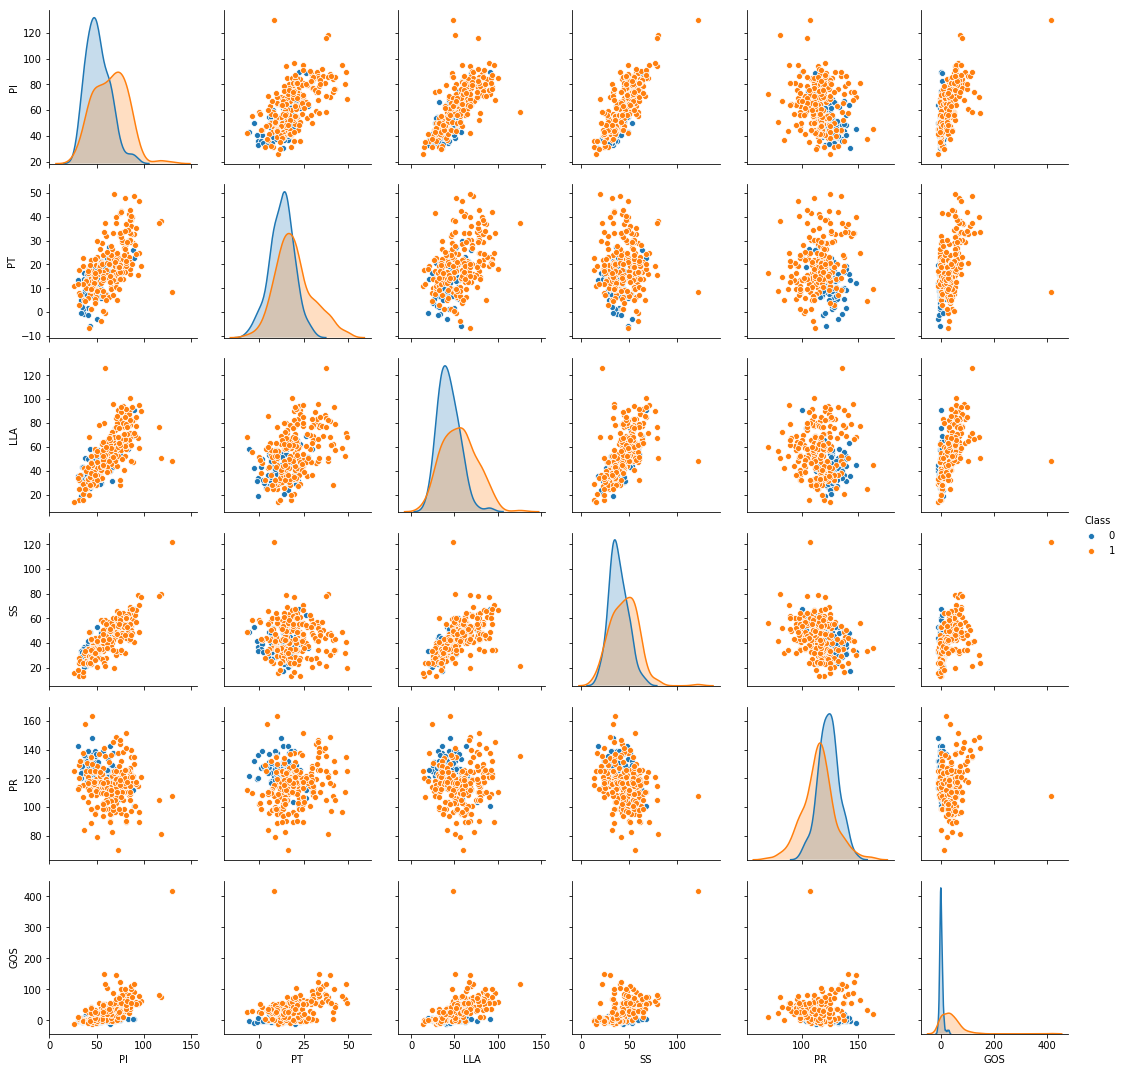

In [17]:
#read .dat file
data = pd.read_table('../data/vertebral_column_data/column_2C.dat', header= None, sep='\s+')
# PI: pelvic incidence, PT: pelvic tilt, LLA: lumbar lordosis angle, SS: sacral slope, PR: pelvic radius, GOS: grade of spondylolisthesis , Class
data.columns = ['PI' ,'PT' ,'LLA' ,'SS' ,'PR' ,'GOS' , 'Class']
# relace NO to 0, AB to 1
data["Class"].replace({"NO": "0", "AB": "1"}, inplace=True)
#hue：classify based on one character
#vars: show attributes which should be researched
sns.pairplot(data, hue="Class",vars=data.columns[0:-1])

ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

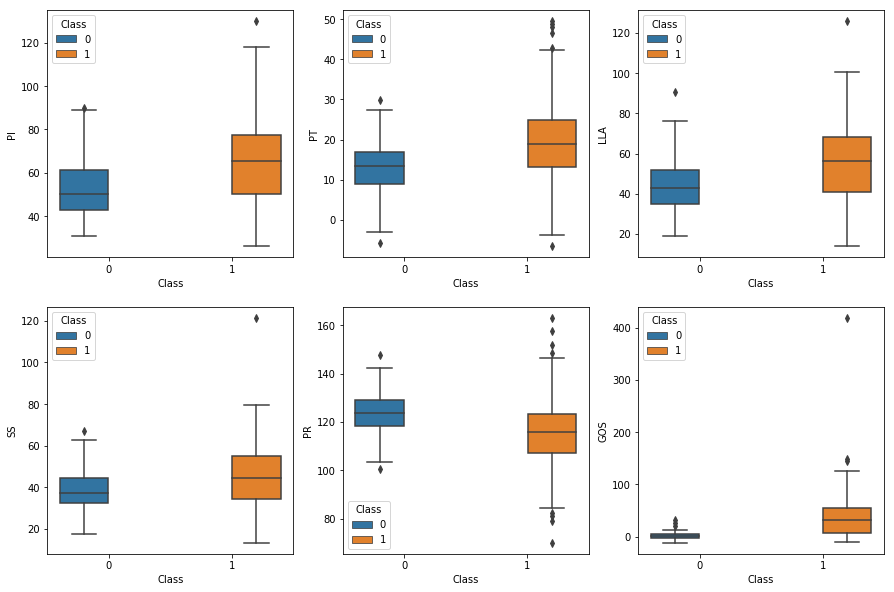

In [18]:

plt.figure(figsize=[15,10])
# data.boxplot(column=['PI' ,'PT' ,'LLA' ,'SS' ,'PR' ,'GOS'], by='Class',patch_artist=True,layout=(2,3))
sns.boxplot(x="Class", y="PI",hue='Class', data=data)
plt.subplot(231)
sns.boxplot(x='Class',y='PI',hue='Class',data=data)
plt.subplot(232)
sns.boxplot(x='Class',y='PT',hue='Class',data=data)
plt.subplot(233)
sns.boxplot(x='Class',y='LLA',hue='Class',data=data)
plt.subplot(234)
sns.boxplot(x='Class',y='SS',hue='Class',data=data)
plt.subplot(235)
sns.boxplot(x='Class',y='PR',hue='Class',data=data)
plt.subplot(236)
sns.boxplot(x='Class',y='GOS',hue='Class',data=data)

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [19]:
data_0 = data[data['Class']== '0']
data_0.reset_index(drop=True, inplace=True)
data_1 = data[data['Class']== '1']
data_1.reset_index(drop=True, inplace=True)
data_train= data_0.loc[:69].append(data_1.loc[:139],ignore_index = True)
data_test= data_0.loc[70:].append(data_1.loc[140:],ignore_index = True)
print(data_train)
print(data_test)

         PI     PT    LLA      SS      PR     GOS Class
0     38.51  16.96  35.11   21.54  127.63    7.99     0
1     54.92  18.97  51.60   35.95  125.85    2.00     0
2     44.36   8.95  46.90   35.42  129.22    4.99     0
3     48.32  17.45  48.00   30.87  128.98   -0.91     0
4     45.70  10.66  42.58   35.04  130.18   -3.39     0
5     30.74  13.35  35.90   17.39  142.41   -2.01     0
6     50.91   6.68  30.90   44.24  118.15   -1.06     0
7     38.13   6.56  50.45   31.57  132.11    6.34     0
8     51.62  15.97  35.00   35.66  129.39    1.01     0
9     64.31  26.33  50.96   37.98  106.18    3.12     0
10    44.49  21.79  31.47   22.70  113.78   -0.28     0
11    54.95   5.87  53.00   49.09  126.97   -0.63     0
12    56.10  13.11  62.64   43.00  116.23   31.17     0
13    69.40  18.90  75.97   50.50  103.58   -0.44     0
14    89.83  22.64  90.56   67.20  100.50    3.04     0
15    59.73   7.72  55.34   52.00  125.17    3.24     0
16    63.96  16.06  63.12   47.90  142.36    6.3

## (c) Classification using KNN on Vertebral Column Data Set

i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k*.

### Optimal K 

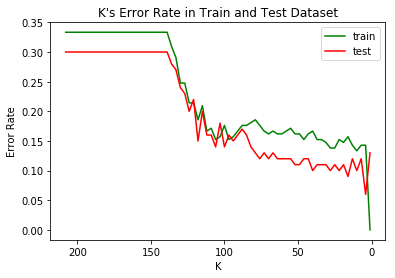

The most suitable k* is :  4
The minuimim Error Rate is : 0.060 


In [20]:
from sklearn.neighbors import KNeighborsClassifier
K_list = list(range(208, 0, -3))
x_train = data_train.drop(['Class'], axis = 1)
y_train = data_train['Class']
x_test = data_test.drop(['Class'],axis = 1)
y_test = data_test['Class']
train_error= []
test_error = []
for k in K_list:
    model = KNeighborsClassifier(n_neighbors = k, p = 2)
    model.fit(x_train,y_train)
    train_accuracy=model.score(x_train, y_train)
    train_error.append(1-train_accuracy)
    
    test_accuracy=model.score(x_test, y_test)
    test_error.append(1-test_accuracy)
    
#plot K's error rate    
plt.plot(K_list, train_error,color='green', label='train' )
plt.plot(K_list, test_error, color='red',label='test') 
plt.title("K's Error Rate in Train and Test Dataset")
plt.xlabel('K')
plt.ylabel('Error Rate')  
plt.legend() 
plt.gca().invert_xaxis() 
plt.show()
# find optimal K*
K_optimal = K_list[test_error.index(min(test_error))]
print('The most suitable k* is : ', K_optimal)
print('The minuimim Error Rate is : %.3f ' % min(test_error))

### confusion matrix

[[25  5]
 [ 1 69]]


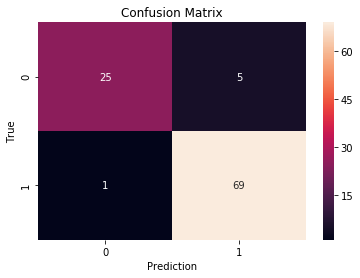

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

model = KNeighborsClassifier(n_neighbors=K_optimal)
model.fit(x_train, y_train)
prediction  = model.predict(x_test)

confusion_metrix = confusion_matrix(y_test, prediction, labels=['0', '1'])
sns.heatmap(confusion_metrix, annot=True)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix')
print(confusion_metrix)

### True Positive Rate & True Negative Rate & Precision & F1-score

In [22]:
#True Positive, False Positive, True Negative, False Negative
#  TPR = TP / ( TP + FN )
# TNR = TN /（TN + FP）
# precision = TP / ( TP + FP )
# Recall =TP/(TP+FN)
# F1-score = 2P*R/(P+R)
TN, FP, FN, TP = confusion_metrix.ravel()

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
P = TP/(TP+FP) 
R = TP/(TP+FN)
F1 = 2*P*R/(P+R)
print ('true positive rate is : %.3f '%TPR)
print ('true negative rate is : %.3f '%TNR)
print ('precision is : %.3f '%P)
print ('F1-score is : %.3f '%F1)

true positive rate is : 0.986 
true negative rate is : 0.833 
precision is : 0.932 
F1-score is : 0.958 


iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}. Note: for each N, selectyour training set by choosing the first [N/3] rows of Class 0 and the first N − [N/3] rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve. 

Text(0.5,1,'Learning Curve')

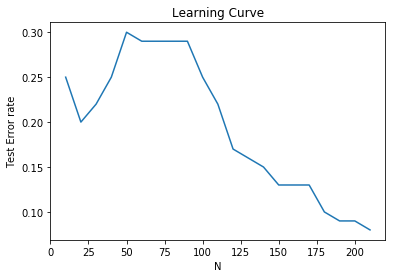

In [23]:
N_list=list(range(10, 211, 10))
best_test_error_N=[]
for N in N_list:
    data_train_N= data_0.loc[:math.floor(N/3)-1].append(data_1.loc[:(N-math.floor(N/3)-1)],ignore_index = True)
    x_train_N = data_train_N.drop(['Class'], axis = 1)
    y_train_N = data_train_N['Class']
    K_list_N = list(range(1, N+1, 5))
    
    min_error=1
    for k in K_list_N:
        model = KNeighborsClassifier(n_neighbors = k, p = 2)
        model.fit(x_train_N,y_train_N)  
        test_accuracy=model.score(x_test, y_test)
        test_error=1-test_accuracy
        if min_error> test_error:
            min_error=test_error
    best_test_error_N.append(min_error)
    
plt.plot(N_list, best_test_error_N)
plt.xlabel('N') 
plt.ylabel('Test Error rate')   
plt.title("Learning Curve")


## (d) Replace the Euclidean metric with the following metrics and test them.
summarize the test errors (i.e., when k = k*) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . ,196}.


| Distance Metrics	|  k*	    |Value of P | 	 Test Error|
|---|---|---|---|
|Manhatten	|6	|1	|0.11|
|N/A|	6|$10^{0.6} $|	0.06|
|Chebyshev	|16|	$\infty$|	0.08|
|Mahalanobis|	1,6	|N/A|	0.17|

<b>i. Minkowski Distance:</b>

A. which becomes Manhattan Distance with p = 1.

In [24]:
K_list = list(range(1, 197, 5))

min_error=1
k_optimal=1
for k in K_list:
    model = KNeighborsClassifier(n_neighbors = k, p = 1)
    model.fit(x_train,y_train)
    
    test_accuracy=model.score(x_test, y_test)
    test_error=1-test_accuracy
    if min_error>test_error:
        min_error=test_error
        k_optimal=k
print('The most suitable k* is : ', k_optimal)
print('The minuimim Error Rate is : %.2f ' % min_error)

The most suitable k* is :  6
The minuimim Error Rate is : 0.11 


B. with log(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k* you found for the Manhattan distance in 1(d)iA. What is the best log(p)?

In [25]:
k_opt=6
min_error=1
P_optimal=0.1
P_list = np.array(10 ** np.arange(0.1, 1.1, 0.1))

for P in P_list:
    model = KNeighborsClassifier(n_neighbors = k_opt, p = P)
    model.fit(x_train,y_train)
    test_accuracy=model.score(x_test, y_test)
    test_error=1-test_accuracy
    if min_error>test_error:
        min_error=test_error
        P_optimal=P
print('The most suitable log10(p) is : ', math.log(P_optimal, 10))
print('The minuimim Error Rate is : %.2f ' % min_error)

The most suitable log10(p) is :  0.6
The minuimim Error Rate is : 0.06 


C. which becomes Chebyshev Distance with p → ∞

In [26]:
min_error=1
k_optimal=1
for k in K_list:
    model = KNeighborsClassifier(n_neighbors = k, metric='chebyshev')
    model.fit(x_train,y_train)
    
    test_accuracy=model.score(x_test, y_test)
    test_error=1-test_accuracy
    if min_error>test_error:
        min_error=test_error
        k_optimal=k
print('The most suitable k* is : ', k_optimal)
print('The minuimim Error Rate is : %.2f ' % min_error)

The most suitable k* is :  16
The minuimim Error Rate is : 0.08 


<b>ii. Mahalanobis Distance.</b>

The most suitable k* is :  [1, 6]
The minuimim Error Rate is : 0.17 


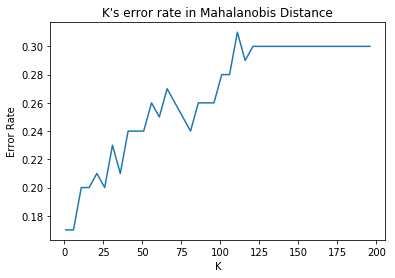

In [27]:
min_error = 1
K_optimal_list=[]
cov_matrix = np.cov(x_train, rowvar=False)
error_list=[]
for k in K_list:
    model = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': np.linalg.pinv(cov_matrix)})
    model.fit(x_train,y_train)
                                                                          
                                                                                      
    test_accuracy=model.score(x_test, y_test)
    test_error=1-test_accuracy
    error_list.append(test_error)
    if min_error>test_error:
        min_error=test_error
plt.plot(K_list, error_list )
plt.title("K's error rate in Mahalanobis Distance")
plt.xlabel('K')
plt.ylabel('Error Rate')  
for index,error in enumerate(error_list):
    if error==min_error:
        K_optimal_list.append(K_list[index])
print('The most suitable k* is : ', K_optimal_list)
print('The minuimim Error Rate is : %.2f ' % min_error)

##  (e) Weighted Decision
The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.

<b>Euclidean</b>

In [28]:
K_list = list(range(1, 197, 5))
min_error=1
k_optimal=1
for k in K_list:
    model = KNeighborsClassifier(n_neighbors = k, p = 2, weights='distance')
    model.fit(x_train,y_train)
    
    test_accuracy=model.score(x_test, y_test)
    test_error=1-test_accuracy
    if min_error>test_error:
        min_error=test_error
        k_optimal=k
print('The most suitable k* is : ', k_optimal)
print('The minuimim Error Rate is : %.2f ' % min_error)

The most suitable k* is :  6
The minuimim Error Rate is : 0.10 


<b>Manhattan</b>

In [29]:
K_list = list(range(1, 197, 5))
min_error=1
k_optimal=1
for k in K_list:
    model = KNeighborsClassifier(n_neighbors = k, p = 1, weights='distance')
    model.fit(x_train,y_train)
    
    test_accuracy=model.score(x_test, y_test)
    test_error=1-test_accuracy
    if min_error>test_error:
        min_error=test_error
        k_optimal=k
print('The most suitable k* is : ', k_optimal)
print('The minuimim Error Rate is : %.2f ' % min_error)

The most suitable k* is :  26
The minuimim Error Rate is : 0.10 


<b>Chebyshev</b>

In [30]:
K_list = list(range(1, 197, 5))
min_error=1
k_optimal=1
K_optimal_list=[]
error_list=[]
for k in K_list:
    model = KNeighborsClassifier(n_neighbors = k,metric='chebyshev', weights='distance')
    model.fit(x_train,y_train)
    
    test_accuracy=model.score(x_test, y_test)
    test_error=1-test_accuracy
    error_list.append(test_error)
    if min_error>test_error:
        min_error=test_error
        k_optimal=k
for index,error in enumerate(error_list):
    if error==min_error:
        K_optimal_list.append(K_list[index])
print('The most suitable k* is : ', K_optimal_list)
print('The minuimim Error Rate is : %.2f ' % min_error)

The most suitable k* is :  [16, 31, 36, 41, 61]
The minuimim Error Rate is : 0.11 


## (f) What is the lowest training error rate you achieved in this homework? 

The lowest training error rate in this homework is 0.06. There are two situation where can achieve this rate:<br>
&emsp;   1. When distance is euclidean distance and K is 4<br>
&emsp;  2. When P= $10^{0.6} $ and K is 6